In [1]:
##load the libraries

In [120]:
#!pip install autogluon

In [3]:
#import the standard libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils import check_array
from scipy import sparse
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from autogluon.tabular import TabularDataset,TabularPredictor
# from sklearn.compose import ColumnTransformer

In [4]:
#loading the dataset
CUS_CHURN_PATH = "C:\\Users\\SKUP\\OneDrive - Capco\\Desktop\\CAPCO\\project"

def load_cus_churn_data(churn_path=CUS_CHURN_PATH):
    csv_path = os.path.join(churn_path,"BankChurners.csv")
    return pd.read_csv(csv_path)

In [5]:
data = load_cus_churn_data()

In [6]:
#check first few rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Amt(Thousands),Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Geography
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,1144000,42,1.625,0.061,Bangalore
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,1291000,33,3.714,0.105,Pune
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,1887000,20,2.333,0.000,Chennai
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,1171000,20,2.333,0.760,Pune
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,816000,28,2.500,0.000,Mumbai


In [43]:
data.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Amt(Thousands)', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Geography', 'Attrition_Flag_Num'],
      dtype='object')

In [45]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [46]:
data['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [47]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [48]:
data['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [49]:
data['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14], dtype=int64)

In [50]:
data['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1], dtype=int64)

In [51]:
data['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5], dtype=int64)

In [52]:
data['Contacts_Count_12_mon'].unique()

array([3, 2, 0, 1, 4, 5, 6], dtype=int64)

In [56]:
data['Credit_Limit'].min(),data['Credit_Limit'].max()

(1438.3, 34516.0)

In [125]:
#data.info()

In [7]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [127]:
## change the target value to numeric

In [8]:
data['Attrition_Flag_Num'] = data['Attrition_Flag'].apply(lambda x: 0 if x == 'Existing Customer' else 1)

In [9]:
data['Attrition_Flag_Num'].value_counts()

0    8500
1    1627
Name: Attrition_Flag_Num, dtype: int64

In [130]:
## drop the unused columns

In [10]:
data.drop(['CLIENTNUM','Attrition_Flag'],inplace=True,axis=1)

In [132]:
## drop the target value

In [11]:
X = data.drop('Attrition_Flag_Num',axis=1).copy()
y = data['Attrition_Flag_Num']

In [134]:
## select only columns with integer data types and convert it into list for future preprocessing

In [24]:
# churn_num = X.select_dtypes(include=['int64','float64']).columns

In [25]:
#churn_cat = X.select_dtypes(include=['object']).columns

In [23]:
# num_attrs = list(churn_num)
# cat_attrs = list(churn_cat)

In [138]:
## get the indexes of categorical columns

In [20]:
# categorical_column_indices = [X.columns.get_loc(col) for col in cat_attrs]
# categorical_column_indices

In [140]:
## train test split

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
# print("X training shape:",X_train.shape)
# print("y training shape:",y_train.shape)
# print("X testing shape:",X_test.shape)
# print("y testing shape:",y_test.shape)

In [90]:
## one hot encoding

In [19]:
# Define feature columns and target variable
features = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category',
            'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
            'Total_Trans_Amt', 'Total_Trans_Amt(Thousands)', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio', 'Geography']

target = 'Attrition_Flag_Num'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Convert categorical features to one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Geography'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [23]:
## SMOT to do the oversampling

In [29]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [147]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), cat_attrs),
#         ('num', 'passthrough', num_attrs)
#     ])

# # Fit and transform the data
# transformed_data = preprocessor.fit_transform(X_train)

# # Get the feature names for the one-hot encoded columns
# # Get the feature names for the categorical columns
# categorical_encoder = preprocessor.named_transformers_['cat'].categories_
# feature_names_cat = [f"{col}_{cat}" for col, cats in zip(cat_attrs, categorical_encoder) for cat in cats]

# # Combine feature names from all columns
# all_feature_names = feature_names_cat + num_attrs

# # Create a DataFrame with the transformed data and feature names
# X_train = pd.DataFrame(transformed_data, columns=all_feature_names)

In [151]:
# # Fit and transform the data
# transformed_data = preprocessor.transform(X_test)

# # Get the feature names for the one-hot encoded columns
# # Get the feature names for the categorical columns
# categorical_encoder = preprocessor.named_transformers_['cat'].categories_
# feature_names_cat = [f"{col}_{cat}" for col, cats in zip(cat_attrs, categorical_encoder) for cat in cats]

# # Combine feature names from all columns
# all_feature_names = feature_names_cat + num_attrs

# # Create a DataFrame with the transformed data and feature names
# X_test = pd.DataFrame(transformed_data, columns=all_feature_names)

In [30]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 6801
After OverSampling, counts of label '0': 6801


In [34]:
## training the model

1) Logistic regression
2) Decision Tree Classifier
3) Random Forest Classifier
4) XGB Classifier
5) Light GBM

In [31]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1699
           1       0.28      0.62      0.38       327

    accuracy                           0.67      2026
   macro avg       0.59      0.65      0.58      2026
weighted avg       0.80      0.67      0.71      2026



In [32]:
# Get feature importance (coefficients) from the model
feature_importance = lr1.coef_[0]

# Create a DataFrame to store feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df

,Feature,Importance
0,Customer_Age,2.285853e-02
2,Months_on_book,1.755696e-02
5,Contacts_Count_12_mon,1.642114e-03
4,Months_Inactive_12_mon,1.401028e-03
1,Dependent_count,6.925354e-04
34,Card_Category_Blue,4.479303e-04
3,Total_Relationship_Count,3.210568e-04
9,Total_Amt_Chng_Q4_Q1,2.561128e-04
15,Gender_F,2.144034e-04
8,Avg_Open_To_Buy,1.387697e-04


In [33]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_res, y_train_res.ravel())
predictions = dt1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1699
           1       0.74      0.82      0.78       327

    accuracy                           0.92      2026
   macro avg       0.85      0.88      0.87      2026
weighted avg       0.93      0.92      0.93      2026



In [35]:
# Get feature importance (coefficients) from the model
feature_importance = dt1.feature_importances_

# Create a DataFrame to store feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df

,Feature,Importance
12,Total_Trans_Ct,0.467782
11,Total_Trans_Amt(Thousands),0.124332
7,Total_Revolving_Bal,0.073358
10,Total_Trans_Amt,0.067603
3,Total_Relationship_Count,0.067536
13,Total_Ct_Chng_Q4_Q1,0.056533
9,Total_Amt_Chng_Q4_Q1,0.036500
0,Customer_Age,0.023253
6,Credit_Limit,0.014968
5,Contacts_Count_12_mon,0.008664


In [36]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_res, y_train_res.ravel())
predictions = rf1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.87      0.88       327

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



In [37]:
# Get feature importance (coefficients) from the model
feature_importance = rf1.feature_importances_


# Create a DataFrame to store feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df

,Feature,Importance
12,Total_Trans_Ct,0.171100
10,Total_Trans_Amt,0.147309
11,Total_Trans_Amt(Thousands),0.147206
13,Total_Ct_Chng_Q4_Q1,0.075936
7,Total_Revolving_Bal,0.066353
9,Total_Amt_Chng_Q4_Q1,0.050998
3,Total_Relationship_Count,0.049035
14,Avg_Utilization_Ratio,0.033197
16,Gender_M,0.028029
0,Customer_Age,0.022327


In [38]:
xgb1 = XGBClassifier()
xgb1.fit(X_train_res, y_train_res.ravel())
predictions = xgb1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.88      0.91      0.89       327

    accuracy                           0.96      2026
   macro avg       0.93      0.94      0.94      2026
weighted avg       0.97      0.96      0.96      2026



In [39]:
# Get feature importance (coefficients) from the model
feature_importance = xgb1.feature_importances_


# Create a DataFrame to store feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df

,Feature,Importance
12,Total_Trans_Ct,0.177853
16,Gender_M,0.101464
15,Gender_F,0.086355
3,Total_Relationship_Count,0.065071
7,Total_Revolving_Bal,0.046213
24,Marital_Status_Divorced,0.043056
10,Total_Trans_Amt,0.041412
25,Marital_Status_Married,0.036099
11,Total_Trans_Amt(Thousands),0.031526
26,Marital_Status_Single,0.031121


In [40]:
lgbm1 = LGBMClassifier()
lgbm1.fit(X_train_res, y_train_res.ravel())
predictions = lgbm1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.91      0.90       327

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [41]:
# Get feature importance (coefficients) from the model
feature_importance = lgbm1.feature_importances_


# Create a DataFrame to store feature importance
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df

,Feature,Importance
10,Total_Trans_Amt,435
9,Total_Amt_Chng_Q4_Q1,329
12,Total_Trans_Ct,319
11,Total_Trans_Amt(Thousands),265
13,Total_Ct_Chng_Q4_Q1,230
0,Customer_Age,165
7,Total_Revolving_Bal,151
3,Total_Relationship_Count,145
6,Credit_Limit,96
8,Avg_Open_To_Buy,93


In [45]:
#autogluon

In [173]:
# df_train,df_test=train_test_split(data,random_state=1)
# test_data=df_test.drop(['Attrition_Flag_Num'],axis=1)
# test_data.head()

In [174]:
# predictor= TabularPredictor(label ='Attrition_Flag_Num').fit(train_data = df_train, verbosity = 2,presets='best_quality')

In [175]:
# predictor.fit_summary()

In [176]:
# predictor.leaderboard(df_train, silent=True)

In [178]:
# ## get the feature importances
# predictor.feature_importance(data=df_train)

In [179]:
# ## predict the data
# y_pred = predictor.predict(test_data)
# y_pred=pd.DataFrame(y_pred,columns=['Attrition_Flag_Num'])
# y_pred

In [180]:
# predictor.evaluate(df_test)

In [40]:
## plotting ROC AUC score

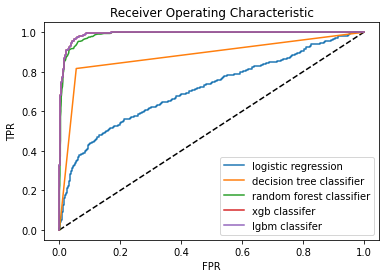

In [42]:
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = lr1.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt1.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rf1.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = xgb1.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = lgbm1.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob5)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "logistic regression")
plt.plot(fpr2, tpr2, label= "decision tree classifier")
plt.plot(fpr3, tpr3, label= "random forest classifier")
plt.plot(fpr4, tpr4, label= "xgb classifer")
plt.plot(fpr4, tpr4, label= "lgbm classifer")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()